# 1) Limpeza dos Dados

Primeiro, temos que carregar os dados e começar a limpeza deles, a fim de corrigir imperfeições nos dados e assim permitir que o modelo de predição tenha dados da melhor qualidade possível para realizar predições:

In [32]:
import os
import csv
import pandas as pd

notebook_path = os.path.abspath("Turing_Case_Tecnico.ipynb")
data_adults = os.path.join(os.path.dirname(notebook_path), "datasets/adult.csv")
data = pd.read_csv(data_adults)

data.head(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [34]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Através de .head(), .info() e .describe(), já obtivemos informações relevantes. Observamos que existem instâncias atribuidas como '?' em mais de uma coluna, que todas as classes estão com os datatypes condizentes, e informações sobre os quartis de algumas colunas.

Vamos checar por duplicatas e excluí-las, caso estejam presentes:

In [35]:
duplicados = data[data.duplicated(keep='first')]
print(duplicados)

       age         workclass  fnlwgt     education  educational-num  \
864     24           Private  194630     Bachelors               13   
11189   37           Private   52870     Bachelors               13   
11212   29           Private   36440     Bachelors               13   
13848   30           Private  180317     Assoc-voc               11   
15960   18      Self-emp-inc  378036          12th                8   
18476   39           Private  184659       HS-grad                9   
19399   19           Private  130431       5th-6th                3   
19726   41           Private  116391     Bachelors               13   
20606   25           Private  308144     Bachelors               13   
21162   25           Private  308144     Bachelors               13   
21385   90           Private   52386  Some-college               10   
24361   21           Private  243368     Preschool                1   
25189   29                 ?   41281     Bachelors               13   
25452 

In [36]:
data.drop_duplicates(keep='first', inplace=True)

Agora, vamos retirar os outiliers para garantir uma melhor generalização dos dados:

In [37]:
import numpy as np

def exclui_outliers(DataFrame, col_name):
    intervalo = 2.7*DataFrame[col_name].std()
    media = DataFrame[col_name].mean()
    DataFrame.loc[data[col_name] < (media - intervalo), col_name] = np.nan
    DataFrame.loc[data[col_name] > (media + intervalo), col_name] = np.nan
    
num_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

for col in num_cols:
    exclui_outliers(data, col)

Checando as colunas, podemos observar a quantidade de instâncias '?' presentes. Especificamente, nos atributos 'workclass', 'occupation' e 'native-country':

In [38]:
print(np.count_nonzero(data['workclass'] == "?"))
print(np.count_nonzero(data['occupation'] == "?"))
print(np.count_nonzero(data['native-country'] == "?"))

2795
2805
856


Como não são muitos dados (inclusive, é possível verificar que a maioria dos '?' em 'workclass' também é '?' em 'occupation'), é possivel excluir as instâncias que possuem esses dados faltantes sem prejudicar muito a análise em geral:

In [39]:
print(data.shape)
data = data.loc[data["workclass"] != '?']
data = data.loc[data["occupation"] != '?']
data = data.loc[data["native-country"] != '?']
data.shape

(48790, 15)


(45175, 15)

# 2) Análise dos Dados

Agora, precisamos visualizar os dados, para entender relações entre atributos, distribuições e subdivisões internas. Podemos usar histogramas para visualizar as classes numéricas e a matriz de correlação para descobrir suas correlações:

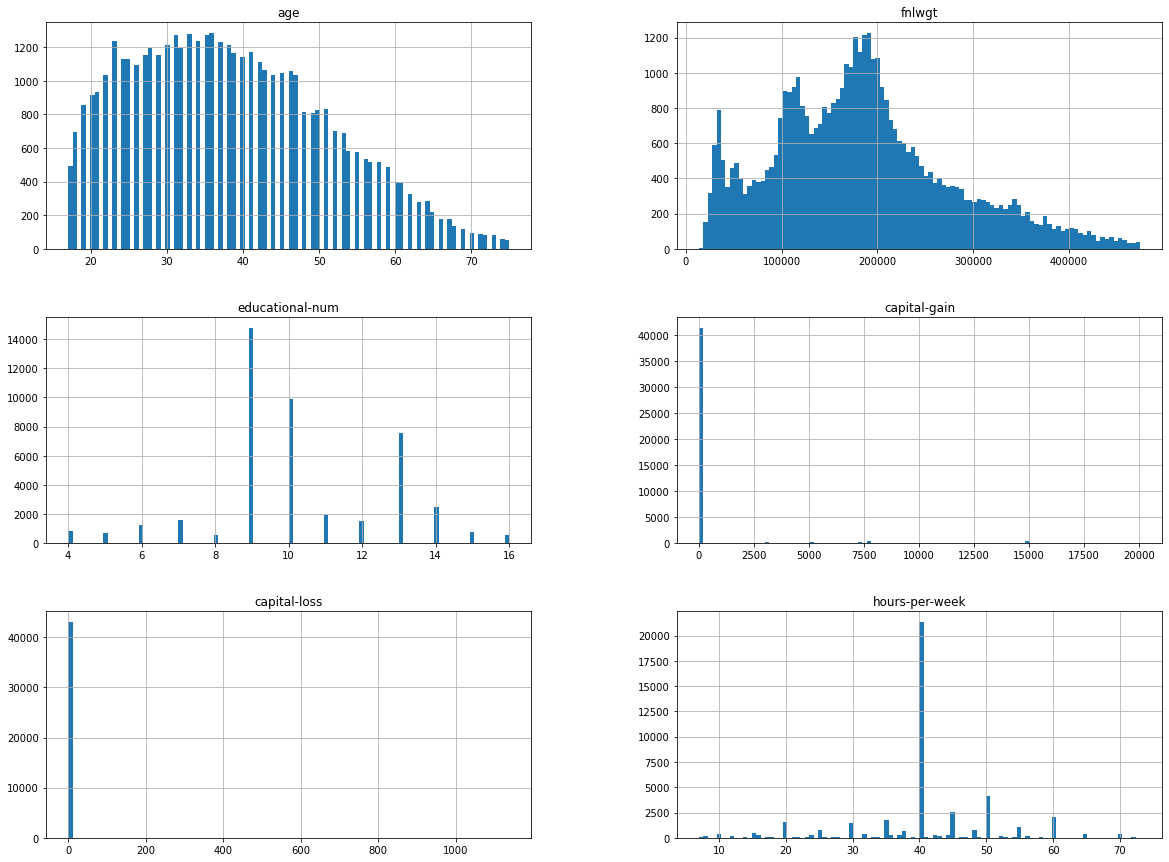

In [40]:
import matplotlib.pyplot as plt

data.hist(bins=100, figsize=(20, 15))
plt.show()

<AxesSubplot:>

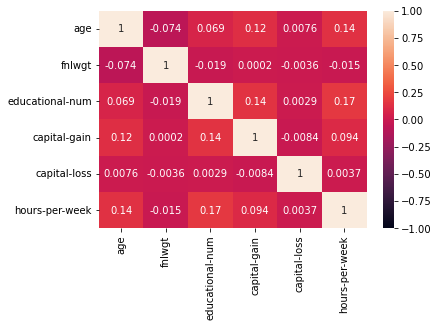

In [41]:
import seaborn as sns

sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)

Algumas características desses dados que podemos observar graças aos histogramas são que a maioria das instâncias possuem entre 20 e 50 anos, entre 9 e 10 anos de educação formal, capital gain e capital loss nulos, e trabalham 40 horas por semana.

Através da matriz de correlação, vemos que todos esses dados estão fracamente correlacionados entre sí.

Vamos agora analisar algumas subdivisões internas dos dados, baseadas nos dados categóricos, de modo a entender melhor a representação de cada subpopulação:

<AxesSubplot:xlabel='income', ylabel='count'>

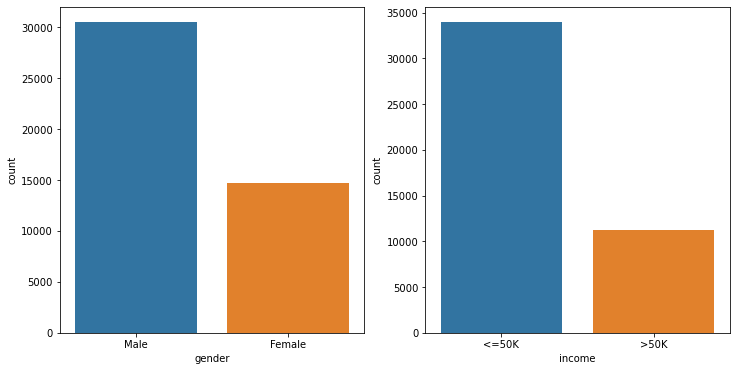

In [42]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.countplot(x=data['gender'])
plt.subplot(122)
sns.countplot(x=data['income'])

<AxesSubplot:xlabel='race', ylabel='count'>

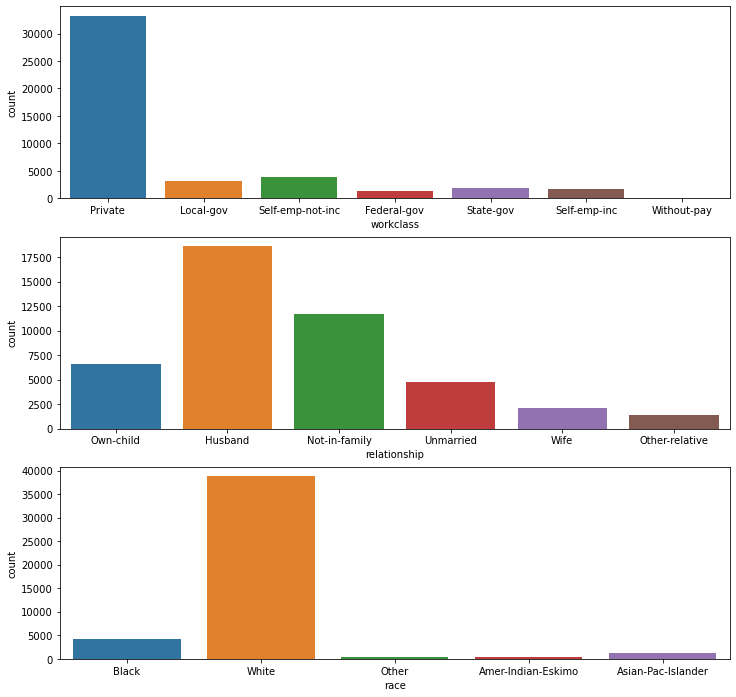

In [43]:
plt.figure(figsize=(12, 12))
plt.subplot(311)
sns.countplot(x=data['workclass'])
plt.subplot(312)
sns.countplot(x=data['relationship'])
plt.subplot(313)
sns.countplot(x=data['race'])

Podemos ver que 2/3 das instâncias são masculinas e apenas 1/3 femininas, e vemos também que aproximadamente 3/4 das instâncias ganham menos que 50K. Também observamos a grande maioria sendo trabalhadores privados, uma grande maioria sendo brancos, e também uma proporção maior de 'maridos'. É importante saber o quão bem ou mal representada é cada subcategoria dos dados, para tentarmos minimizar as distorções causadas por essas diferenças.

A análise que nos importa é em relação ao atributo 'income'. Desse modo, vamos visualizar mais a relação deste com outros atributos:

<AxesSubplot:xlabel='hours-per-week', ylabel='income'>

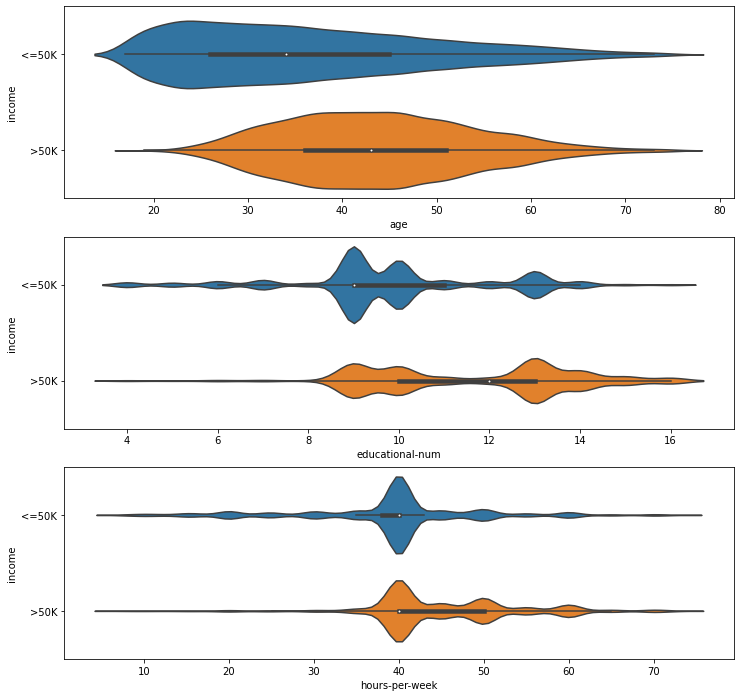

In [44]:
plt.figure(figsize=(12, 12))
plt.subplot(311)
sns.violinplot(x='age', y='income', data=data)
plt.subplot(312)
sns.violinplot(x='educational-num', y='income', data=data)
plt.subplot(313)
sns.violinplot(y='income', x='hours-per-week', data=data)

Percebemos que há uma tendência maior de que instâncias com idade maior ganhem mais de 50K, enquanto aquelas com menos idade (em especial, menos de 20 ou 30 anos), menos de 50K.

Também vemos que instâncias com mais anos de educação também tem uma tendência um pouco maior de ganhar mais de 50K do que aquelas com menos anos de estudo.

Notamos, por último, que instâncias com mais horas de trabalho por semana também possuem uma tímida tendência a ganharem mais de 50K do que aquelas com menos horas.

Com tudo isso em mente, podemos lidar melhor com nosso dados. Poderíamos, por exemplo, focar mais nos dados de anos de educação, idade e horas por semana para treinar o modelo, descartando outras colunas menos correlatas com a renda. A super-representação de instâncias masculinas, brancas, do setor privado e 'maridos', que observamos, pode gerar distorções nas predições, em razão da subrepresentação de outras classes. Uma forma de lidar com isso seria estratificando os dados, de modo que cada classe seja proporcionalmente melhor representada.

Para manter a análise simples, vamos estretificar apenas por gênero, para que a população feminina seja melhor representada. A escolha é motivada pela conhecida diferença de remuneração entre homens e mulheres, com mulheres recebendo menores salários para desempenhar as mesmas funções que homens, então é importante que elas não sejam representadas de forma desproporcional. Outra escolha interessante seria estratificar por 'raça/etnia', pois também é sabido que, por exemplo, populações negras sofrem mais com situações de vulnerabilidade econômica, empregos subvalorizados, violência social, racismo estrutural, entre outros problemas sociais que afetam a população negra como um todo (incluindo sua renda).

# 3) Modelos de Predição

Primeiramente, precisamos separar os dados entre dados de treino e dados de teste. Visando uma melhor representação proporcional de gênero, vamos estratificar os dados com base em cada um deles e depois separar os grupos em test set e train set:

In [45]:
data = data.replace(['Male'], 0)
data = data.replace(['Female'], 1)

numerical_col = ['gender']

def to_type(DataFrame, columns, type):
    for col in columns:
        DataFrame[col] = DataFrame[col].astype(type)
        
to_type(data, numerical_col, float)

<AxesSubplot:>

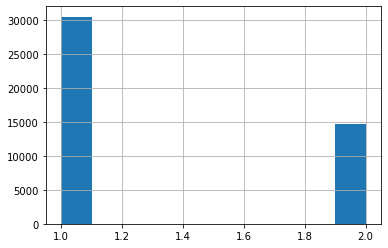

In [46]:
data['gender_cat'] = pd.cut(data['gender'], bins=[-1.0, 0.9, np.inf], labels=[1, 2])
data['gender_cat'].hist()

In [47]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data['gender_cat']):
    strat_train_set = data.iloc[train_index]
    strat_test_set = data.iloc[test_index]

In [48]:
strat_test_set['gender_cat'].value_counts() / len(strat_test_set)

1    0.675042
2    0.324958
Name: gender_cat, dtype: float64

In [49]:
data['gender_cat'].value_counts() / len(data)

1    0.675042
2    0.324958
Name: gender_cat, dtype: float64

Agora, para melhor visualizarmos os efeitos da estratificação, é possível observarmos a representação de cada categoria (1 - 'Male', 2 - 'Female') nos dados completos, comparando as proporções de cada uma no test set gerado com amostragem estratificada, e num test set com amostragem aleatória:

In [50]:
from sklearn.model_selection import train_test_split

def gender_cat_proportions(data):
    return data['gender_cat'].value_counts() / len(data)

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

compare_proportions = pd.DataFrame({
    "Overall": gender_cat_proportions(data),
    "Stratified": gender_cat_proportions(strat_test_set),
    "Random": gender_cat_proportions(test_set),
}).sort_index()

compare_proportions["Rand. %error"] = 100 * compare_proportions["Random"] / compare_proportions["Overall"] - 100
compare_proportions["Strat. %error"] = 100 * compare_proportions["Stratified"] / compare_proportions["Overall"] - 100

compare_proportions

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.675042,0.675042,0.673492,-0.229546,0.0
2,0.324958,0.324958,0.326508,0.476839,0.0


O test set gerado com amostragem estratificada tem proporções de gênero mais próximas àquelas do dataset completo (inclusive, com erro próximo a zero), enquanto as proporções do test set gerado de forma aleatória possuem uma distorção.

In [51]:
data = strat_train_set.drop('income', axis=1)
data_labels = strat_train_set['income'].copy()

In [52]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('gender_cat', axis=1, inplace=True)

Vamos agora lidar com os dados numéricos e categóricos usando as Pipelines. Assim, preparamos os dados preenchendo quaisquer dados possivelmente faltantes, escalando os dados para a escala certa para ser usada pelos modelos, etc:

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("cat_encoder", OneHotEncoder(sparse=False)),
])

num_attributes = ["age", "fnlwgt", "educational-num", "capital-gain", "capital-loss", "hours-per-week"]
cat_attributes = ["workclass", "race", "gender"]

preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", cat_pipeline, cat_attributes),
])

x_train = preprocess_pipeline.fit_transform(strat_train_set[num_attributes + cat_attributes])
y_train_all = strat_train_set['income']

y_train = (y_train_all == '>50K')

Agora que os dados estão preparados, podemos treinar os classificadores para obter previsões baseados neles. Vamos usar apenas três classificadores, que são bem conhecidos e bem usados em diversos tipos de problema de análise de dados:

In [54]:
from sklearn.ensemble import RandomForestClassifier

for_clf = RandomForestClassifier(n_estimators=100, random_state=42)
for_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(x_train, y_train)

SVC(gamma='auto', random_state=42)

In [56]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss='log', random_state=42)
sgd_clf.fit(x_train, y_train)

SGDClassifier(loss='log', random_state=42)

Agora, vamos avaliar o desempenho de cada um deles de acordo com a acurácia de cada um:

In [57]:
from sklearn.model_selection import cross_val_score

for_scores = cross_val_score(for_clf, x_train, y_train, cv=10, scoring="accuracy")
print('random forest: ', for_scores.mean())

svm_scores = cross_val_score(svm_clf, x_train, y_train, cv=10, scoring="accuracy")
print('support vector machine: ', svm_scores.mean())

sgd_scores = cross_val_score(sgd_clf, x_train, y_train, cv=10, scoring="accuracy")
print('stratified gradient descent: ', sgd_scores.mean())

random forest:  0.8044272274488102
support vector machine:  0.8216657443276147
stratified gradient descent:  0.8134753735473161


Aparentemente a acurácia da SVM parece melhor que dos outros modelos. Para observar qual modelo poderia generalizar melhor para os dados de teste, podemos visualizar os vários valores de acurácia obtidos com boxplot:

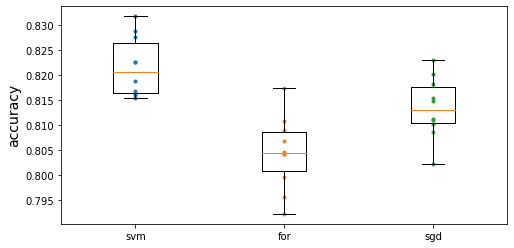

In [58]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, for_scores, ".")
plt.plot([3]*10, sgd_scores, ".")
plt.boxplot([svm_scores, for_scores, sgd_scores], labels=("svm", "for", "sgd"))
plt.ylabel("accuracy", fontsize=14)
plt.show()

Aparantemente, SVM generalizaria melhor para os dados de teste, pois as estimativas desse modelo são, no geral, mais acuradas em relação aos outros dois.

Como SVM é o modelo aparentemente mais promissor, podemos, através do GridSearchCV, tentar reajustar os seus parâmetros com o intuito de obter previsões mais acuradas. Podemos ver os parâmetros pelo método svm_clf.get_params():

In [59]:
svm_clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Cada linha representa um parâmetro diferente que o classificador svm usa para determinar as previsões. Podemos imaginar como se o svm estivesse procurando a maior 'rua possível' entre o grupo de quem ganha >50K e o que ganha menos de 50K. Pra isso, ele usa algumas instâncias específicas do dataset (os "support vectors"). O parâmetro C, por exemplo, diria qual a tolerância do svm em relação a instâncias dentro dessa rua. Se C for grande, a margem da rua permite menos instâncias dentro dela (e assim, menos instâncias sendo classificadas erroneamente). Se C for menor, permite que hajam mais instâncias dentro da rua (classificadas erroneamente), mas gerando uma separação maior entre os grupos.

Para fins de simplicidade, vamos nos concentrar apenas nesse parâmetro C, apenas para demonstrar como é o processo de ajuste dos hiperparâmetros de um estimador. Testemos, então, vários valores desse parâmetro a fim de tentar otimizar a acurácia do classificador:

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'C':[1, 10, 100]}]

grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring="accuracy", return_train_score=True)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'C': 10}

Se não fazemos ideia de quais valores colocar inicialmente, podemos começar colocando diferentes potências de dez e ir diminuindo os chutes ao redor do que obtiver o melhor resultado. Após algumas tentativas, vemos que o melhor valor de C para a acurácia é C=11:

In [61]:
param_grid = [{'C':[11, 12, 13]}]

grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring="accuracy", return_train_score=True)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'C': 11}

Agora, vamos ver qual o novo valor da acurácia para C=11:

In [62]:
svm_clf = SVC(gamma="auto", C=11, random_state=42)
svm_clf.fit(x_train, y_train)

svm_scores = cross_val_score(svm_clf, x_train, y_train, cv=10, scoring="accuracy")
print('support vector machine: ', svm_scores.mean())

support vector machine:  0.8218594355285003


Conseguimos uma acurácia de aproximadamente 82.19%, parece bom! No entanto, em problemas de classificação, a acurácia não é a melhor forma de determinar o desempenho de um determinado modelo, pois a taxa de acerto pode simplesmente se dar por distorções nos dados, representação abundante de certa classe em detrimento de outras, entre outros fatores. Um classificador totalmente aleatório ainda poderia ter uma acurácia de 90% em prever a probabilidade de que um dígito qualquer de 0 a 9 não seja 8, por exemplo, simplesmente porque existem muito mais instâncias que não são 8 do que as que são.

Uma alternativa é observar quantos falsos positivos (FP), falsos negativos (FN), positivos verdadeiros (TP) e negativos verdadeiros (TN) são obtidos por cada um dos modelos, pela confusion matrix:

In [63]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_predict_for = cross_val_predict(for_clf, x_train, y_train, cv=5)
print('for:', confusion_matrix(y_train, y_predict_for))  

print('')
y_predict_svm = cross_val_predict(svm_clf, x_train, y_train, cv=5)
print('svm:', confusion_matrix(y_train, y_predict_svm))

print('')
y_predict_sgd = cross_val_predict(sgd_clf, x_train, y_train, cv=5)
print('sgd:', confusion_matrix(y_train, y_predict_sgd))

for: [[24483  2646]
 [ 4430  4581]]

svm: [[26014  1115]
 [ 5323  3688]]

sgd: [[24509  2620]
 [ 4245  4766]]


No canto superior esquerdo, temos o número de TN, no superior direito, FP, no inferior esquerdo, FN, e no inferior direito, TP.

Outra forma de avaliar classificadores é a determinação do precision score, do recall score, e do f1 score:

In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_for = precision_score(y_train, y_predict_for)
recall_for = recall_score(y_train, y_predict_for)
f1_for = f1_score(y_train, y_predict_for)

print('for:', precision_for, recall_for, f1_for)

precision_svm = precision_score(y_train, y_predict_svm)
recall_svm = recall_score(y_train, y_predict_svm)
f1_svm = f1_score(y_train, y_predict_svm)

print('svm:', precision_svm, recall_svm, f1_svm)

precision_sgd = precision_score(y_train, y_predict_sgd)
recall_sgd = recall_score(y_train, y_predict_sgd)
f1_sgd = f1_score(y_train, y_predict_sgd)

print('sgd:', precision_sgd, recall_sgd, f1_sgd)

for: 0.6338729763387297 0.5083786483187216 0.5642320482818081
svm: 0.7678534249427441 0.4092775496615248 0.5339510641378312
sgd: 0.6452748443000271 0.5289091110864499 0.5813258522900531


Precision tem relação a quantidade de vezes que o classificador classifica uma instância como positiva, e ele acerta. Recall, por sua vez, tem a ver com quantas vezes uma instância que é positiva está inclusa nas que o modelo classifica como positivas. Por exemplo, se treinarmos um modelo para detectar videos que são seguros para crianças, seria melhor um classificador que rejeite muitos videos bons (baixo recall), mas mantenha apenas os vídeos seguros (alta precision). Em contrapartida, um sistema que detecta incêndios teria preferivelmente um recall alto, mesmo ao custo de uma precision baixa, pois mesmo que alguns falsos positivos sejam gerados, a chance de um incêndio real ser identificado é muito maior. Podemos calcular essas métricas: Precision = TP / (TP + FP), Recall = TP / (TP + FN), e f1 é a média harmônica entre Precision e Recall.

Agora podemos entender melhor que, mesmo com uma acurácia maior que 82%, a svm tem uma precisão de aproximadamente 76.79% e um recall de apenas 40.93%. Ou seja, a precisão dela é de 76%, entretanto ele deixa quase 60% das instâncias que seriam verdadeiras (que ganham mais de 50K, nesse caso) passarem.

O problema com relação a precision e recall é que, no geral, quanto maior o recall menor a precisão, e quanto maior a precisão, menor o recall. Para lidar com esse dilema, o chamado "precision/recall trade-off", podemos usar a decision_function. O classificador determina para dada instância uma pontuação, baseada nessa decision_function. Se essa pontuação for menor que um certo threshold, a instância é classificada como negativa. Se for maior, é positiva. Quanto maior o threshold, maior precision e menor recall. Quanto menor o threshold, menor precision e maior recall.

Para decidir qual threshold usar, podemos computar precision e recall para todos os valores do threshold, usando a precision_recall_curve(). Assim, para a svm:

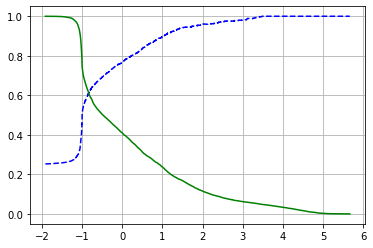

In [65]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_scores_svm = cross_val_predict(svm_clf, x_train, y_train, cv=5, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores_svm)

def precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="recall")
    
precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.grid(True)
plt.show()

A precision é dada pela curva azul tracejada. O recall, pela curva verde. O threshold é dado pelo eixo x (horizontal). Observe como quanto maior o threshold, maior a precision e menor o recall. Se quisermos, por exemplo, que a precisão seja de 90%, podemos procurar pelo menor threshold que nos dá uma precisão de pelo menos 90%, e usar esse valor como o valor do nosso threshold. Podemos também fazer com que precision seja igual ao recall, por exemplo:

In [66]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
print(threshold_90_precision)

y_predict_90 = (y_scores_svm >= threshold_90_precision)

print(precision_score(y_train, y_predict_90))
print(recall_score(y_train, y_predict_90))

1.0398598319505834
0.9002169197396963
0.23027410942181778


In [67]:
threshold_precision_recall = thresholds[np.argmax(precisions >= recalls)]
print(threshold_precision_recall)

y_precision_recall = (y_scores_svm >= threshold_precision_recall)

print(precision_score(y_train, y_precision_recall))
print(recall_score(y_train, y_precision_recall))

-0.8346530976715534
0.6116968150038842
0.6116968150038842


Outra forma de avaliar os classificadores é a Receiver Operating Characteristic (ROC) curve. Diferente da Precision/Recall curve, a ROC curve plota a taxa de positivos verdadeiros vs a taxa de falsos positivos:

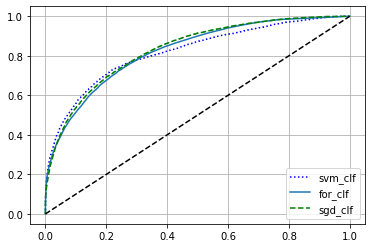

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr_svm, tpr_svm, thresholds_smv = roc_curve(y_train, y_scores_svm)

y_probas_for = cross_val_predict(for_clf, x_train, y_train, cv=5, method="predict_proba")
y_scores_for = y_probas_for[:, 1]

fpr_for, tpr_for, thresholds_for = roc_curve(y_train, y_scores_for)

y_scores_sgd = cross_val_predict(sgd_clf, x_train, y_train, cv=5, method="decision_function")

fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_train, y_scores_sgd)

plt.plot(fpr_svm, tpr_svm, "b:", label="svm_clf")
plt.plot(fpr_for, tpr_for, label="for_clf")
plt.plot(fpr_sgd, tpr_sgd, "g--", label="sgd_clf")
plt.plot([0, 1], [0, 1], "k--")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Também podemos comparar a ROC area under curve (AUC), que é a área sob a curva ROC:

In [69]:
print("svm_clf:", roc_auc_score(y_train, y_scores_svm))
print("for_clf:", roc_auc_score(y_train, y_scores_for))
print("sgd_clf:", roc_auc_score(y_train, y_scores_sgd))

svm_clf: 0.8198638236966438
for_clf: 0.8243713591579794
sgd_clf: 0.8317164494283609


A linha tracejada no meio indica a ROC curve para um classificador totalmente aleatório. Quanto melhor o classificador, mais longe dessa linha ele se localiza e maior o valor da ROC AUC. Um classificador perfeito teria ROC AUC igual a 1.

Vemos que nesse caso a svm, mesmo possuindo acurácia maior que os outros dois classificadores, possui um ROC AUC score menor que do random_forest ou do SGD.

No geral, podemos preferir usar a Precision/Recall curve quando classes positivas são raras, ou quando devemos nos atentar mais a falsos positivos do que falsos negativos (mais precision do que recall). Se esses não forem o caso, talvez seja mais interessante usar a ROC curve. Assim sendo, caso a nossa maior preocupação não for a precisão na determinação de quem ganha mais de 50K, mas sim que a maior quantidade possível de pessoas que ganha mais de 50K sejam classificadas como tal, então poderíamos priorizar o uso do SGD, pois o seu ROC AUC score é maior.

Uma última coisa que poderíamos fazer, também, seria combinar todos os estimadores em um único preditor, pois a combinação de estimadores diversos tem a possibilidade de resultar em predições melhores do que cada um individualmente, devido as suas diferentes características, pontos fortes e fracos, e a forma como cada um estima seus resultados. O nome disso é ensemble learning, e um algoritmo de ensemble learning é chamado de ensemble method. A própria Random Forest que usamos aqui na verdade é um exemplo de ensemble method, pois ela é a combinação de vários estimadores chamados Decision Trees.

Vamos agora usar esse ensemble method combinando os três estimadores que usamos (vamos usar acurácia pois, mesmo não sendo a melhor forma de se avaliar classificadores, é interessante para ilustrar o uso de ensemble learning):

In [70]:
from sklearn.ensemble import VotingClassifier

vot_clf = VotingClassifier(estimators=[('svm', svm_clf), ('for', for_clf), ('sgd', sgd_clf)], voting='hard')
vot_clf.fit(x_train, y_train)

vot_scores = cross_val_score(vot_clf, x_train, y_train, cv=10, scoring="accuracy")

print('random forest accuracy: ', for_scores.mean())
print('support vector machine accuracy: ', svm_scores.mean())
print('stratified gradient descent accuracy: ', sgd_scores.mean())
print('combination of all three classifiers accuracy: ', vot_scores.mean())

random forest accuracy:  0.8044272274488102
support vector machine accuracy:  0.8218594355285003
stratified gradient descent accuracy:  0.8134753735473161
combination of all three classifiers accuracy:  0.8247094631986718


Obtivemos uma acurácia de 82.47%, maior do que a de todos os outros classificadores individualmente! O método de ensemble learning é muito útil, e mesmo a combinação de vários 'weak learners' (classificadores não muito melhores que um escolhedor aleatório) pode resultar num classificador substancialmente melhor.

O hiperparâmetro 'voting' nos diz como é decidida a votação entre os diferentes classificadores. 'hard voting' é quando simplesmente agregamos as predições de cada classificador e predizemos a classe que recebe mais votos. Simplesmente o voto da maioria. Podemos também fazer o que é conhecido como 'soft voting', que é quando a classe predita é aquela com a maior probabilidade, sendo essa probabilidade determinada com base na média das probabilidades de cada classificador. Para usar soft voting, basta usarmos 'probability=True' na svm, pois assim ela vai estimar as probabilidades relacionadas com cada classe:

In [71]:
svm_clf = SVC(gamma="auto", C=11, probability=True, random_state=42)
svm_clf.fit(x_train, y_train)

vot_clf = VotingClassifier(estimators=[('svm', svm_clf), ('for', for_clf), ('sgd', sgd_clf)], voting='soft')
vot_clf.fit(x_train, y_train)

vot_scores = cross_val_score(vot_clf, x_train, y_train, cv=10, scoring="accuracy")

print('random forest accuracy: ', for_scores.mean())
print('support vector machine accuracy: ', svm_scores.mean())
print('stratified gradient descent accuracy: ', sgd_scores.mean())
print('combination of all three classifiers accuracy: ', vot_scores.mean())

random forest accuracy:  0.8044272274488102
support vector machine accuracy:  0.8218594355285003
stratified gradient descent accuracy:  0.8134753735473161
combination of all three classifiers accuracy:  0.8240730492529054
